In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [4]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [5]:
#

In [6]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)


In [7]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [8]:
#두 번째로 처리해야 할 것은 바로 타겟 데이터에 해당하는 price 컬럼이죠
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
del train['id']
print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [10]:
test['date'] = test['date'].apply(lambda i:i[:6]).astype(int)
del test['id']
print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


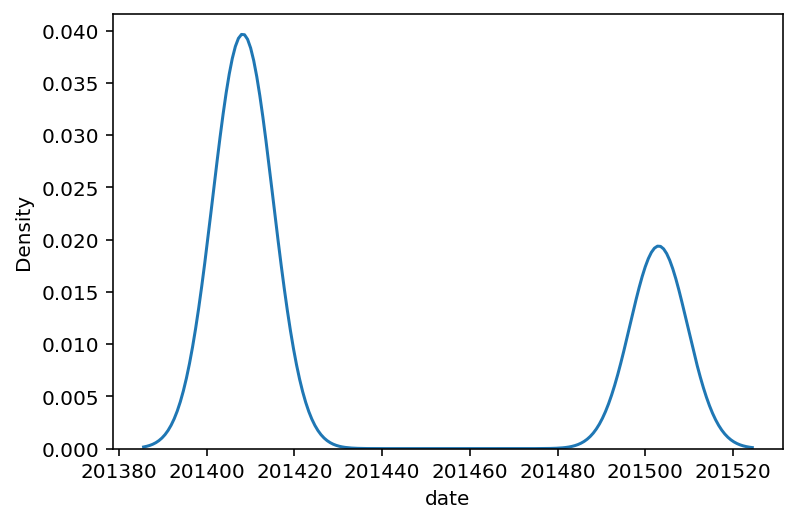

date


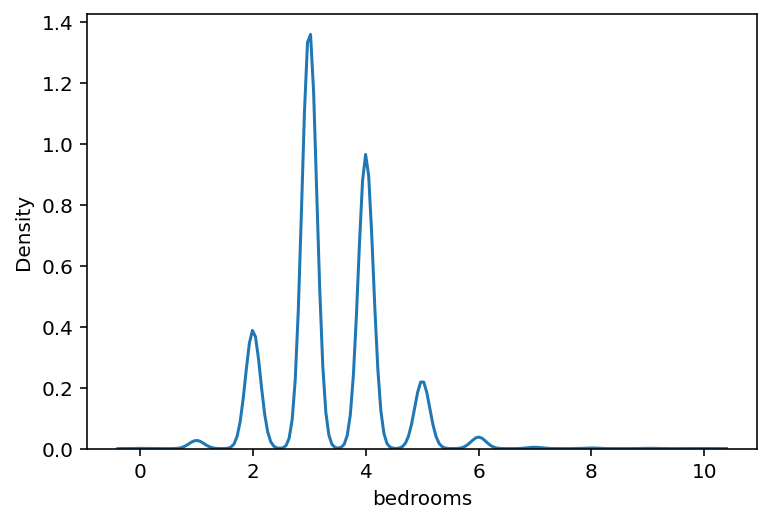

bedrooms


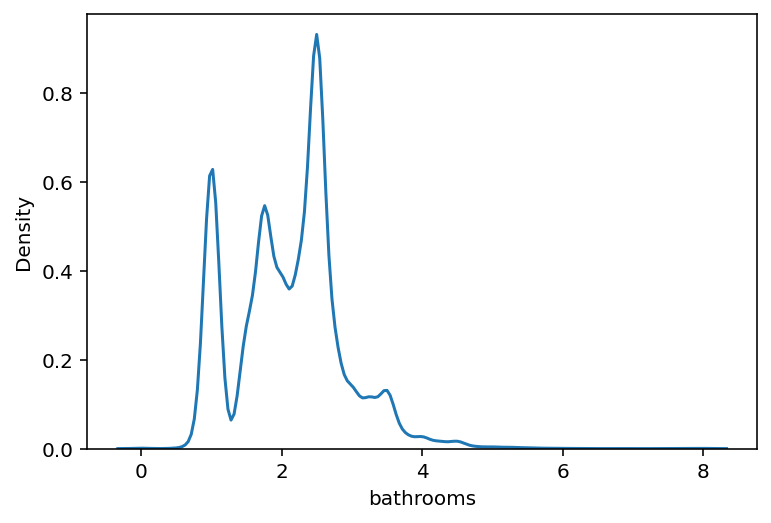

bathrooms


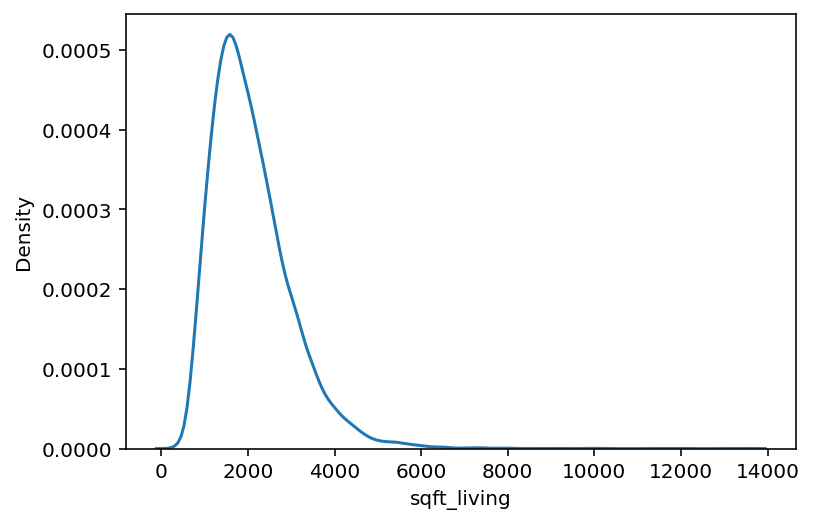

sqft_living


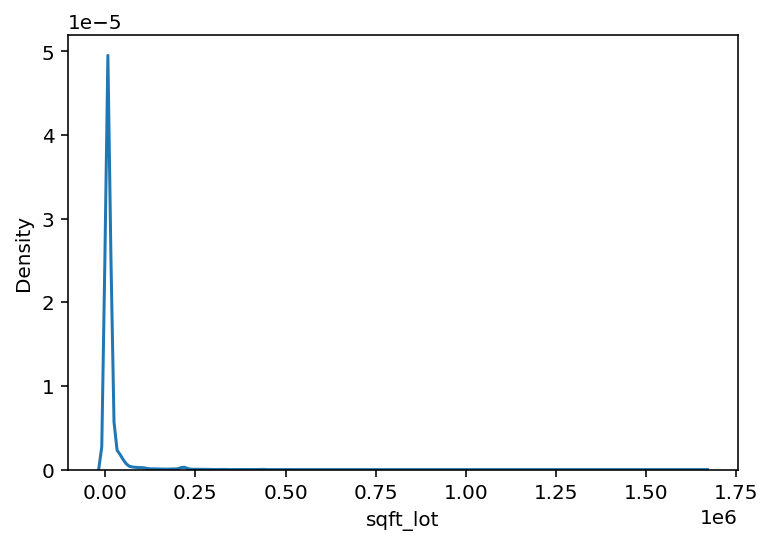

sqft_lot


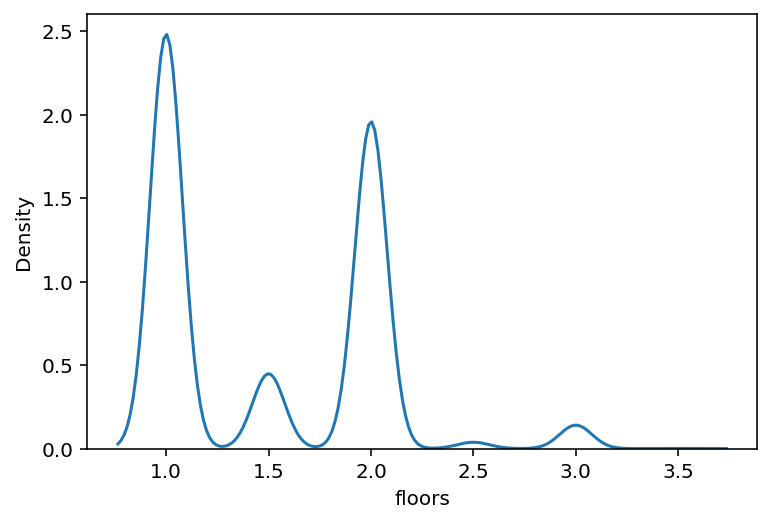

floors


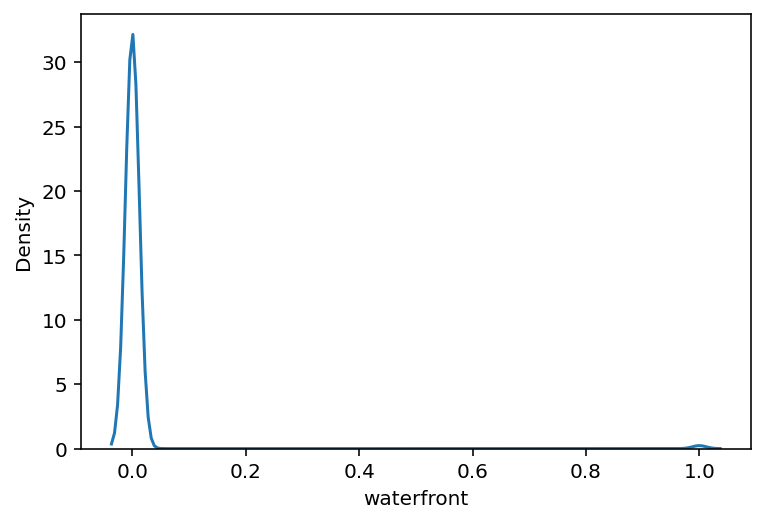

waterfront


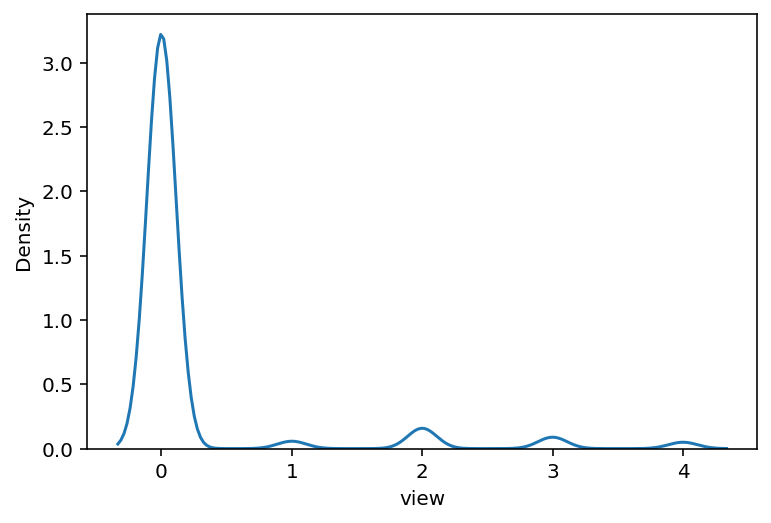

view


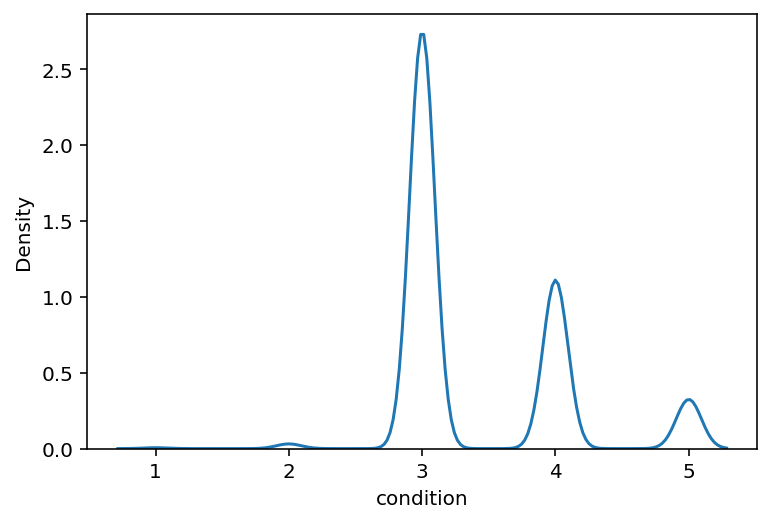

condition


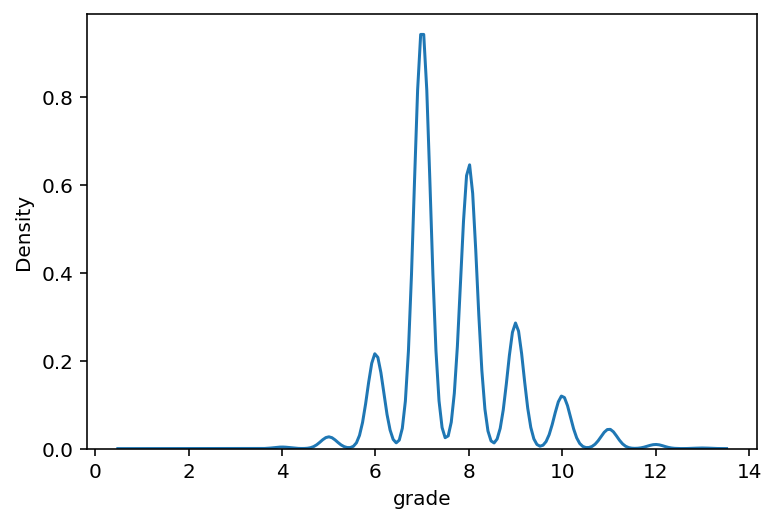

grade


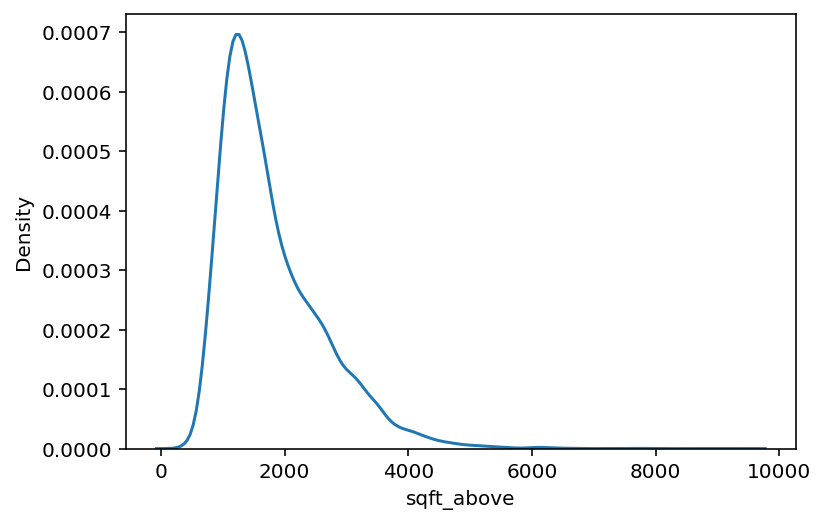

sqft_above


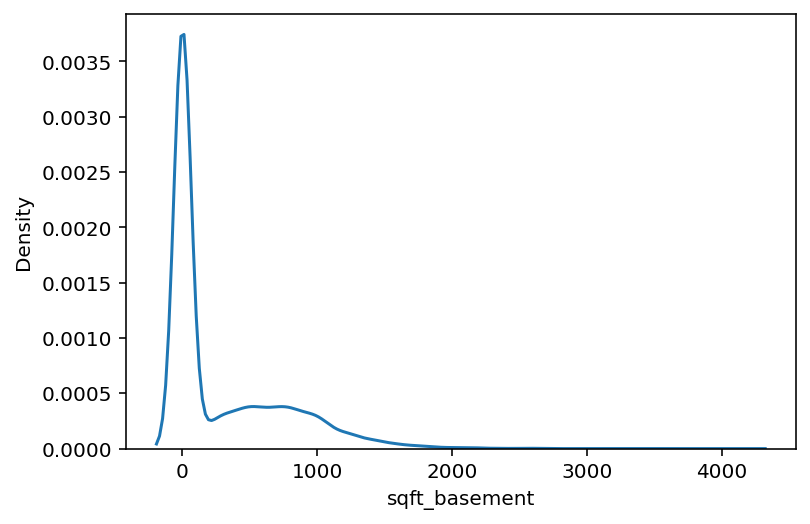

sqft_basement


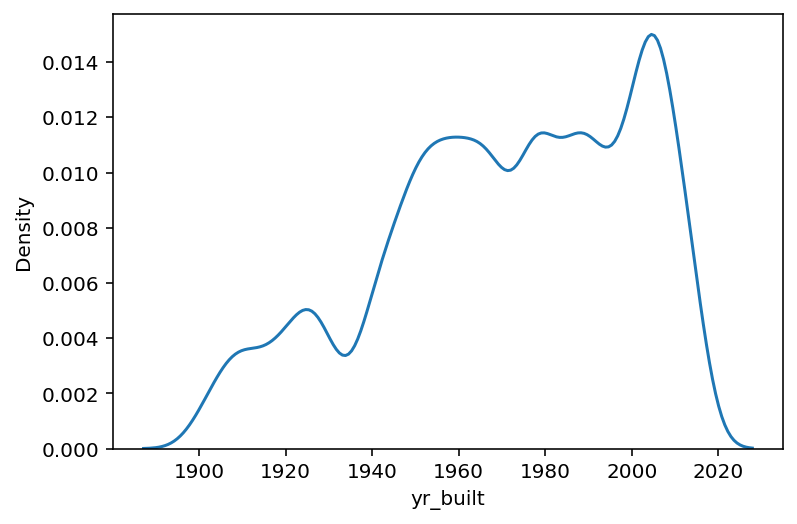

yr_built


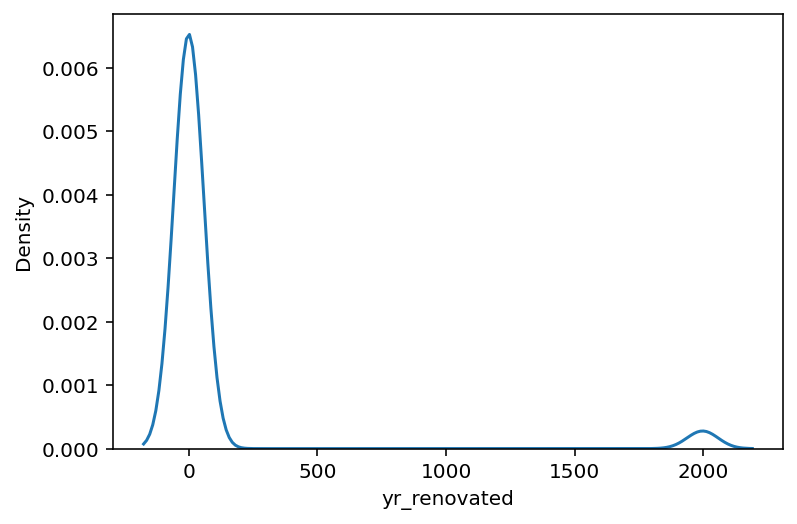

yr_renovated


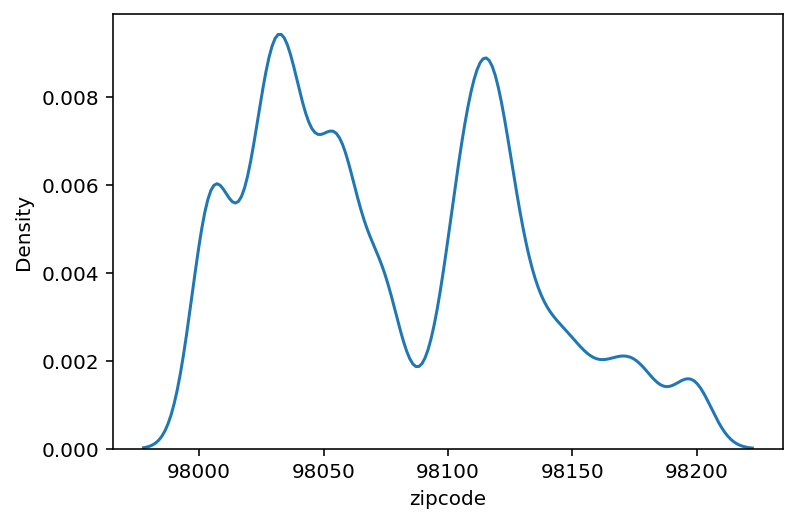

zipcode


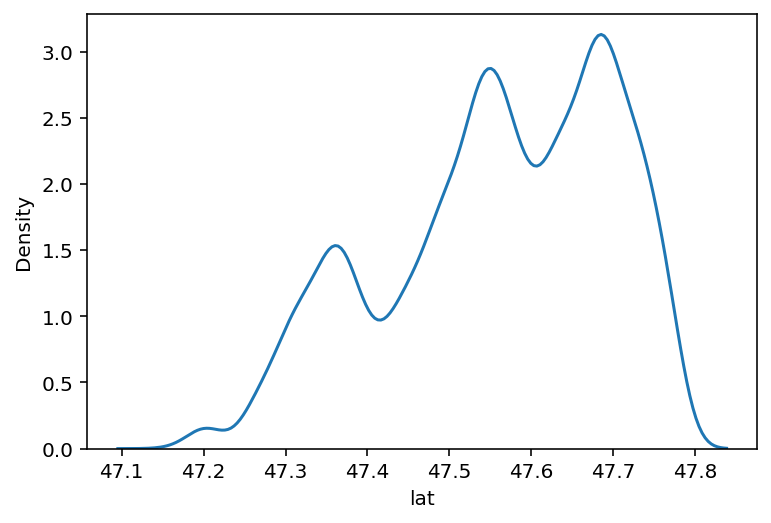

lat


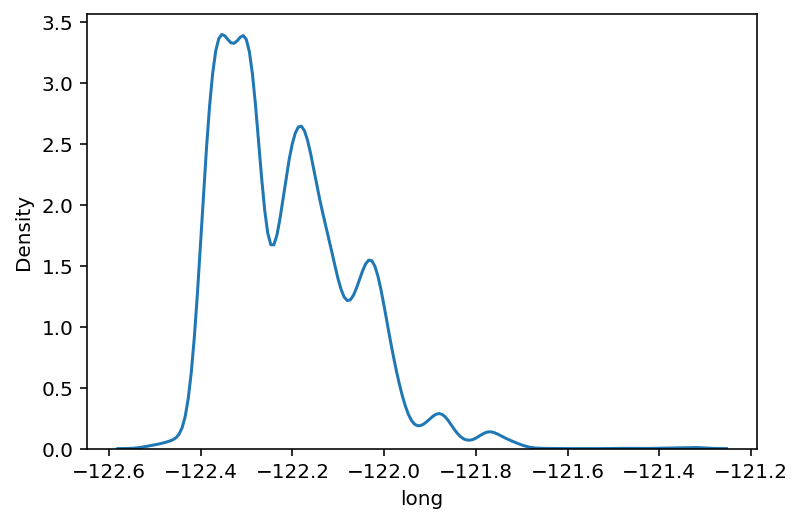

long


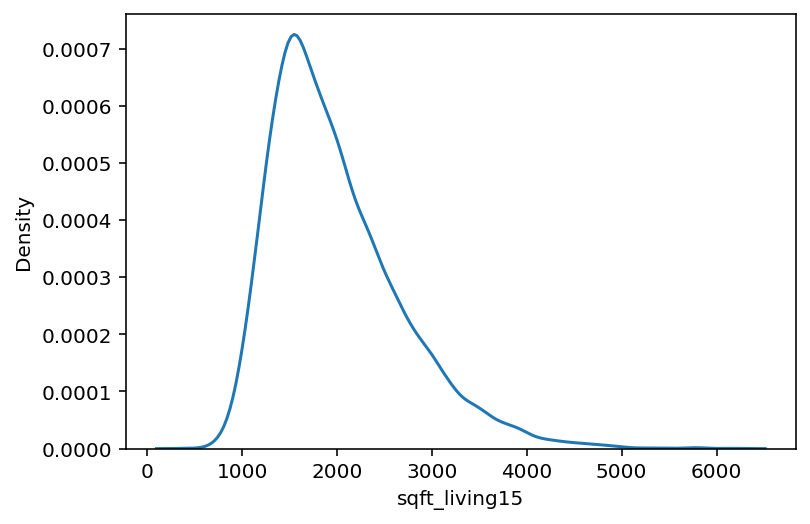

sqft_living15


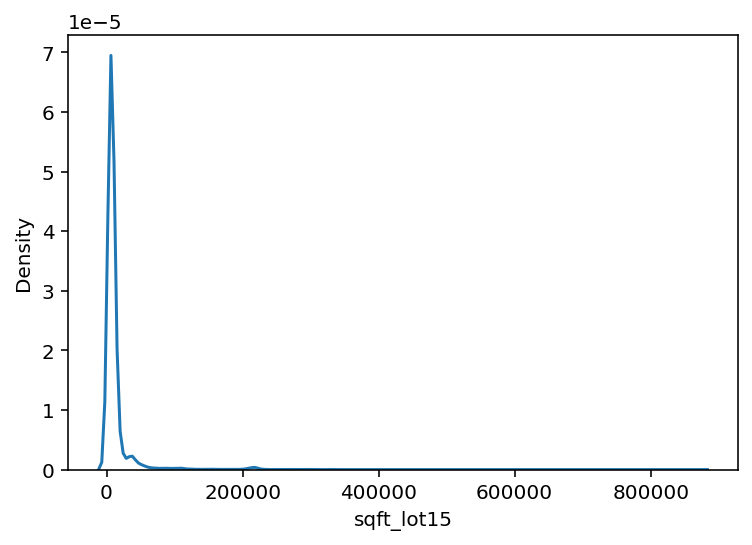

sqft_lot15


In [11]:
for i in train.columns:
    a = train[i]
    sns.kdeplot(a)
    plt.show()
    print(i)
    

grade와 condition의 지표가 이상해보인다. 삭제해보겠다.

In [12]:
#del train['grade']
#del test['grade']
#del train['condition']
#del test['condition']

In [13]:
train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [14]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

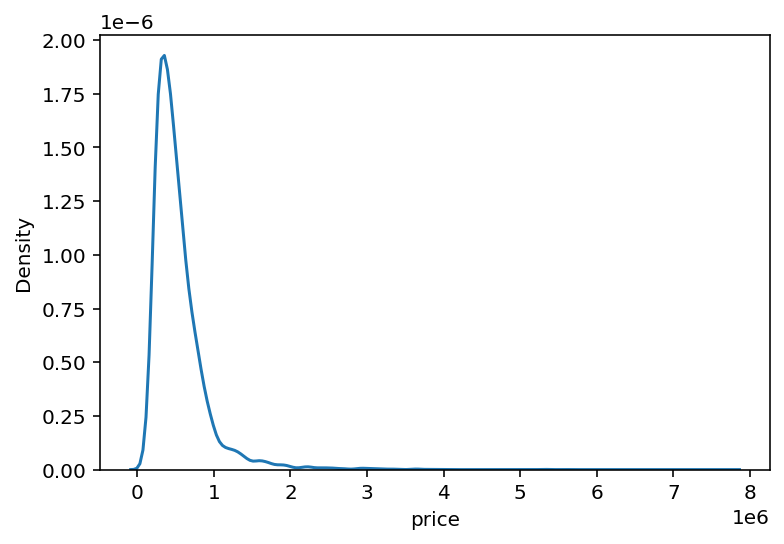

In [15]:
sns.kdeplot(y)
plt.show()

In [16]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

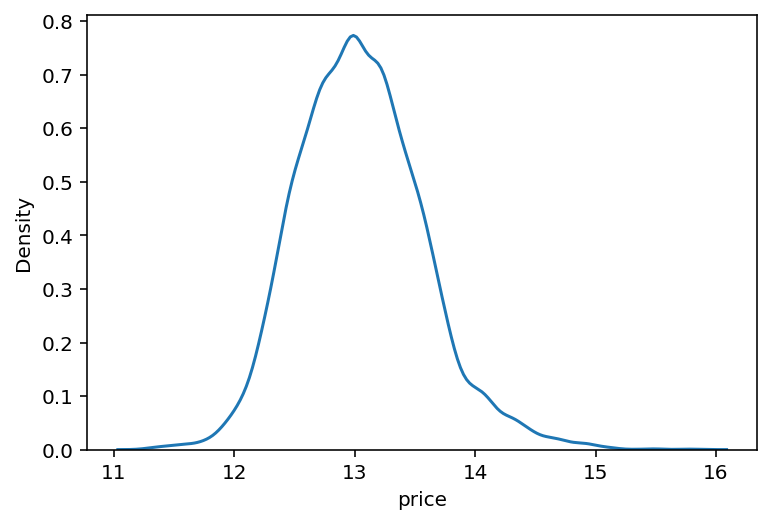

In [17]:
sns.kdeplot(y)
plt.show()

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [19]:
#3-10


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [21]:
def rmse(y_test, y_pred):
    return mean_squared_error(np.expm1(y_test),np.expm1(y_pred)) **0.5

In [22]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [23]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(metric = 'regression_l2', nrounds = 1000, random_state=random_state)
lightgbm = LGBMRegressor(Loss = 'regression_l2', num_iterations=1000, random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest] #학습 모델 배열

In [24]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [25]:
df = {}
for model in models:
    model_name = model.__class__.__name__
    
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state , test_size=0.2)
    
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    df[model_name] = rmse(y_test, y_pred)
    
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
score_df

[17:54:30] WARNING: ../src/learner.cc:573: 
Parameters: { "metric", "nrounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[LightGBM] [Warning] Unknown parameter: Loss


,RMSE
GradientBoostingRegressor,128360.196497
RandomForestRegressor,125487.071025
XGBRegressor,110318.669566
LGBMRegressor,109487.231363


In [27]:
#모델과 데이터만 있으면 rmse결과값을 나타내주므로 이제 하이퍼파라미터만 건들면된다. 그러기위해 사요 ㅇGridSearchCv
from sklearn.model_selection import GridSearchCV

print('얍💢')

얍💢


In [28]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

In [54]:
model = LGBMRegressor(Loss = 'regression_l2', num_iterations=1000, random_state=random_state)
#LGBMRegressor(random_state=random_state)
print('얍💢')

얍💢


In [55]:
#model, param_grid와 함께 다른 여러 가지 인자를 넣어서 GridSearchCV를 수행할 수 있습니다!
grid_model = GridSearchCV(model, param_grid = param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=5)
grid_model.fit(train,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use i

[LightGBM] [Warning] Unknown parameter: Loss


GridSearchCV(cv=5,
             estimator=LGBMRegressor(Loss='regression_l2', num_iterations=1000,
                                     random_state=2020),
             n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [56]:
grid_model.cv_results_

{'mean_fit_time': array([ 3.58336682,  3.68478694, 11.57856984, 11.3695652 ]),
 'std_fit_time': array([0.20680522, 0.4482396 , 0.62801968, 0.62371653]),
 'mean_score_time': array([0.40236821, 0.3832221 , 1.57506456, 1.11798744]),
 'std_score_time': array([0.04824873, 0.03427762, 0.2617465 , 0.51861654]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.03593637, -0.03593637, -0.02673951, -0.02673951]),
 'split1_test_score': array([-0.03827009, -0.03827009, -0.02796249, -0.02796249]),
 'split2_test_score': array([-0.0374

In [57]:
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [58]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.03651692, -0.03651692, -0.02673912, -0.02673912])

In [59]:
# 여기에 코드를 작성하세요.
results = pd.DataFrame(params)
results['score'] = score

results

,max_depth,n_estimators,score
0,1,50,-0.036517
1,1,100,-0.036517
2,10,50,-0.026739
3,10,100,-0.026739


In [60]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,max_depth,n_estimators,score,RMSE
0,1,50,-0.036517,0.191094
1,1,100,-0.036517,0.191094
2,10,50,-0.026739,0.163521
3,10,100,-0.026739,0.163521


In [61]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,max_depth,n_estimators,score,RMSLE
0,1,50,-0.036517,0.191094
1,1,100,-0.036517,0.191094
2,10,50,-0.026739,0.163521
3,10,100,-0.026739,0.163521


In [62]:
# 위의 표를 `RMSLE`가 낮은 순서대로 정렬해주세요.
results = results.sort_values('RMSLE')
results

,max_depth,n_estimators,score,RMSLE
2,10,50,-0.026739,0.163521
3,10,100,-0.026739,0.163521
0,1,50,-0.036517,0.191094
1,1,100,-0.036517,0.191094


In [63]:
"""
다음과 같은 과정을 진행할 수 있는 `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` 함수를 구현해 보세요.

1. GridSearchCV 모델로 `model`을 초기화합니다.
2. 모델을 fitting 합니다.
3. params, score에 각 조합에 대한 결과를 저장합니다. 
4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.
"""

# 코드 입력
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    #1. GridSearchCV 모델로 `model`을 초기화합니다.
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring = 'neg_mean_squared_error', cv=5, verbose=verbose, n_jobs=n_jobs)
    #2. 모델을 fitting 합니다.
    grid_model.fit(train,y)

    #3. params, score에 각 조합에 대한 결과를 저장합니다. 
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    #4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다
    results = pd.DataFrame(params)
    results['score'] = score

    #RMSLE
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    return results

In [64]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

In [66]:
#model = LGBMRegressor(random_state=random_state)
model = LGBMRegressor(Loss = 'regression_l2', num_iterations=1000, random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use i

,max_depth,n_estimators,score,RMSLE
2,10,50,-0.026739,0.163521
3,10,100,-0.026739,0.163521
0,1,50,-0.036517,0.191094
1,1,100,-0.036517,0.191094


In [41]:
#가장 좋은 조합은 max_depth=10, n_estimators=100 이군요.

In [67]:
model = LGBMRegressor(max_depth = 10, n_estimators=50, Loss = 'regression_l2', num_iterations=1000, random_state=random_state)
model.fit(train,y)
prediction = model.predict(test)
prediction

array([13.19495169, 13.11873096, 14.01893003, ..., 13.05179856,
       12.72122862, 13.00310932])

In [68]:
prediction = np.expm1(prediction)
prediction

array([ 537642.88051594,  498186.08760612, 1225585.45639546, ...,
        465932.667101  ,  334778.91334668,  443790.13608839])

In [69]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [70]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,5.376429e+05
1,15036,4.981861e+05
2,15037,1.225585e+06
3,15038,2.809225e+05
4,15039,3.260536e+05


In [75]:
submission_csv_path = "{}/submission_{}_RMSLE_{}.csv".format(data_dir, 'lgbm', '0.163521')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.163521.csv


In [72]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [76]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.163521')

[LightGBM] [Warning] Unknown parameter: Loss
/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.163521.csv saved!


In [74]:

score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
print(score_df)

#score_df = pd.DataFrame(df, index=['RMSE']).sort_values('RMSE', ascending=False)
#print(score_df)

a = pd.DataFrame([1,2,3])
b = pd.DataFrame([1,2,3])

print(np.dot(a.T,b))


                                    RMSE
GradientBoostingRegressor  128360.196497
RandomForestRegressor      125487.071025
XGBRegressor               110318.669566
LGBMRegressor              109487.231363
[[14]]
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.5s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.7s
[CV] END ......................max_depth=10, n_estimators=50; total time=   1.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.3s
[LightGBM] [Warning] Unknown parameter: Loss
[LightGBM] [Warning] Unknown parameter: Loss
[LightGBM] [Warning] Unknown parameter: Loss
[LightGBM] [Warning] Unknown parameter: Loss
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.3s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.8s
[CV] END .....................max_depth=1

<h2>회고</h2>

기존에 예시로 주어진 baseline은 reindexing관련 오류때문에 실행이 제대로 되지않아 노드를 baseline으로 잡고 실행하였다.

11줄에 있는 sns.kdeplot을 통해 다양한 데이터를 살펴보았을 때, grade, condition같은 데이터의 분포를 보면 난잡하여 

이 데이터를 삭제하고 모델을 돌려보았는데 오히려 RMSE값이 높게 나오는 모습을 띄면서 다시 원래 데이터로 실험하게 되었다.

과정은 이러하다.
 
1. 데이터 처리 

2. 여러가지 모델을 두고 전부 fit, predict하여 RMSE값을 계산한다.

3. 가장 낮았던 model인 LGBMRegressor을 통해 다시 세세하게 GridSearchCV를 해본 결과로써 파라미터값들을 얻게 되었다.

4. n_estimator과 max_depth의 정보를 얻었다

5. 이 파라미터에서 더 나아가 Loss함수 MSE구하는 regression_l2로 설정했고, num_iterations=1000은 노드에 있던 http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/ 사이트에서 보았던 것인데, 100은 너무 적고,
1000은 되야한다 하여 설정하였더니 아래와 같이 RMSE가 나오게 되었다.

6. csv파일로 저장까지 하였다.



                                 RMSE
GradientBoostingRegressor	128360.196497

RandomForestRegressor     	125487.071025 

XGBRegressor	            110318.669566

LGBMRegressor	            109487.231363

그렇게 parameter을 변경해가면서 실험을 해보던 중, 
model = LGBMRegressor(max_depth = 10, n_estimators=50, Loss = 'regression_l2', num_iterations=1000, random_state=random_state)을 통해

109487.~라는 private score이 나오게 되면서 루브릭 기준을 만족하게끔 해 보았다.

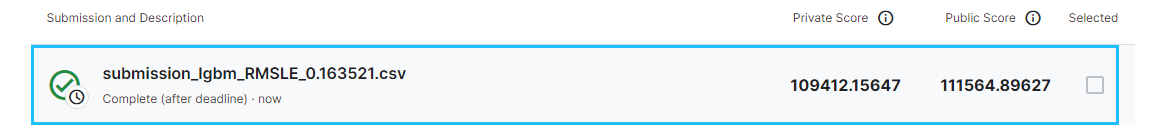

